<a href="https://colab.research.google.com/github/Jordy-Rodrigues/PROJETO-DEEP-LEARNING-02/blob/main/Deep_Learning_Rede_Convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REDE NEURAL CONVOLUCIONAL - DEEP LEARNING

In [31]:
# USAR A BIBLIOTECA AVISO 'WARNINGS' PARA IGNORAR AS MENSAGENS DE TEXTO QUE APARECERIA AO EXECUTAR O PROGRAMA
import warnings
warnings.filterwarnings('ignore')

In [32]:
# IMPORTAR AS BIBLIOTECAS BÁSICAS
import torch
import torchvision
import torchvision.transforms as transforms

In [33]:
# NORMALIZAR OS DADOS
transforms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

In [34]:
batch_size = 4 # QUANTIDADE DE IMAGENS PARA VISUALIZAÇÃO

# CARREGAR OS DADOS 
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False, num_workers=2)

classes = ('aeronave', 'carro', 'passaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhao') # NOME DOS 10 TIPOS DE IMAGENS DO DATASET

Files already downloaded and verified
Files already downloaded and verified


VISUALIZAR AS IMAGENS

In [35]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
  img = (img * 0.5) + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

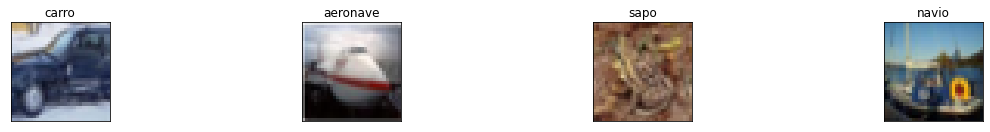

In [36]:
import numpy as np
dataiter = iter (trainloader)
images, labels = dataiter.next()

fig = plt.figure(figsize=(20,4))
for idx in np.arange(4):
  ax = fig.add_subplot(2, 8/2, idx + 1, xticks=[], yticks= [])
  imshow(images[idx])
  ax.set_title(classes[labels[idx]])
  

In [37]:
# MONTAR A ARQUITETURA DA REDE NEURAL
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d (3, 6, 5)
      self.pool = nn.MaxPool2d (2, 2)
      self.conv2 = nn.Conv2d (6, 16, 5)
      self.fc1 = nn.Linear (16 * 5 * 5, 120)
      self.fc2 = nn.Linear (120, 84)
      self.fc3 = nn.Linear (84, 10)

  def forward(self, x):
    x = self.pool (F.relu(self.conv1(x)))
    x = self.pool (F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

cnn = CNN()

In [38]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr= 0.006, momentum = 0.8)

TREINAR O MODELO

In [39]:
epochs = 4
for epoch in range (epochs):
  running_loss = 0.0
  for i, data in enumerate (trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = cnn (inputs)
    loss = criterion (outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %
          (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
    
print('Finished Training')

[1,  2000] loss: 2.050
[1,  4000] loss: 1.729
[1,  6000] loss: 1.621
[1,  8000] loss: 1.579
[1, 10000] loss: 1.524
[1, 12000] loss: 1.476
[2,  2000] loss: 1.413
[2,  4000] loss: 1.423
[2,  6000] loss: 1.424
[2,  8000] loss: 1.387
[2, 10000] loss: 1.390
[2, 12000] loss: 1.388
[3,  2000] loss: 1.331
[3,  4000] loss: 1.330
[3,  6000] loss: 1.375
[3,  8000] loss: 1.331
[3, 10000] loss: 1.363
[3, 12000] loss: 1.343
[4,  2000] loss: 1.283
[4,  4000] loss: 1.311
[4,  6000] loss: 1.312
[4,  8000] loss: 1.335
[4, 10000] loss: 1.315
[4, 12000] loss: 1.308
Finished Training


SALVAR O MODELO

In [40]:
import os
model_path = './model/'
file_name = 'cnn_model.pth'

if not os.path.exists (model_path):
  os.makedirs (model_path)

torch.save (cnn.state_dict(), model_path + file_name)


TREINANDO O MODELO

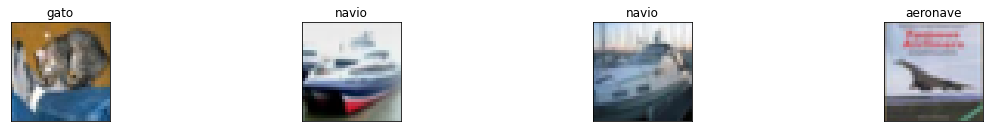

In [41]:
dataiter = iter (testloader)
images, labels = dataiter.next()

fig = plt.figure(figsize=(20,4))
for idx in np.arange(4):
  ax = fig.add_subplot (2, 8/2, idx + 1, xticks = [], yticks = [])
  imshow (images[idx])
  ax.set_title (classes [labels[idx]])


IMPORTAR MODELO TREINADO

In [42]:
cnn = CNN()
cnn.load_state_dict (torch.load (model_path + file_name))

<All keys matched successfully>

FAZENDO PREVISÃO

In [43]:
outputs = cnn (images)
outputs

_, predicted = torch.max (outputs, 1)
print(' Predicted: ', ' '. join ('%5s'% classes [predicted[j]] 
                                 for j in range (4)))

 Predicted:   gato carro aeronave aeronave


PERFORMANCE DO MODELO NO DATASET COMPLETO

In [44]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = cnn (images)
    _, predicted = torch.max (outputs. data, 1)
    total += labels.size(0)
    correct += (predicted == labels). sum().item()

print('Accuracy of the network on the 10.000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10.000 test images: 54 %


PERFORMANCE POR CLASSE 

In [45]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = cnn (images)
    _, predictions = torch.max (outputs, 1)

    for label, prediction in zip (labels, predictions):
      if label == prediction:
        correct_pred [classes[label]] += 1
      total_pred [classes[label]] += 1

for classname, correct_count in correct_pred.items():
  accuracy = 100 * float (correct_count) / total_pred [classname]
  print('Acuracy for class {:5s} is: {:.1f} %'.format (classname, accuracy))

Acuracy for class aeronave is: 72.2 %
Acuracy for class carro is: 74.5 %
Acuracy for class passaro is: 25.7 %
Acuracy for class gato  is: 35.7 %
Acuracy for class veado is: 43.8 %
Acuracy for class cachorro is: 47.7 %
Acuracy for class sapo  is: 62.8 %
Acuracy for class cavalo is: 64.6 %
Acuracy for class navio is: 61.0 %
Acuracy for class caminhao is: 56.9 %
